<a href="https://colab.research.google.com/github/JingfengSteven/NAM_Model_Monotonicity/blob/Model/Model_training%20(only%20individual)%20modified%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JingfengSteven/givemesomecredit

Cloning into 'givemesomecredit'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 4.40 MiB | 5.90 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
from givemesomecredit import models_single_only as nam_models
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

In [3]:
orgdata=pd.read_csv("givemesomecredit/cs-training.csv")
orgdata=orgdata.dropna(axis=0)
orgdata.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data=orgdata

In [5]:
x=data.iloc[:,2:data.shape[1]]
y=data.iloc[:,1]
x.insert(data.shape[1]-2, 'label', y)
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,label
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [6]:
x=np.array(x)
x.shape

(120269, 11)

##Data cleaning

In [7]:
x[:,[0,2]]=x[:,[2,0]]
x[:,[1,8]]=x[:,[8,1]]
x[:,[2,6]]=x[:,[6,2]]
x[:,[3,4]]=x[:,[4,3]]
x[:,[4,9]]=x[:,[9,4]]

In [8]:
x1=x

##First 5 features follow single monotonicity

In [9]:
x1 = np.delete(x1, np.where
    (x1[:,0] >= 20), axis=0)
x1 = np.delete(x1, np.where
    (x1[:,1] >= 20), axis=0)
x1 = np.delete(x1, np.where
    (x1[:,2] >= 20), axis=0)

In [10]:
x1.shape

(120121, 11)

In [11]:
x1[:,0][x1[:,0]>=4]=4
x1[:,1][x1[:,1]>=4]=4
x1[:,2][x1[:,2]>=4]=4

In [12]:
x1[:,3][(x1[:,3]>=0)&(x1[:,3]<2500)]=5
x1[:,3][(x1[:,3]>=2500)&(x1[:,3]<5000)]=4
x1[:,3][(x1[:,3]>=5000)&(x1[:,3]<7500)]=3
x1[:,3][(x1[:,3]>=7500)&(x1[:,3]<10000)]=2
x1[:,3][(x1[:,3]>=10000)&(x1[:,3]<50000)]=1
x1[:,3][x1[:,3]>=50000]=0

In [13]:
x1[:,4][x1[:,4]>=5]=5

In [14]:
X=x1[:,0:len(x1[0])-1]
Y=x1[:,-1]

In [15]:
tf.compat.v1.reset_default_graph()
#the change of the structure of NAM is in kwargs)
#in this demo, first three feature are strong monotonicity, thereby, they are combined in a DNN.
Number_of_DNN=10
Number_of_Unit=0
Trainable=True
Use_Shallow=False
Model=nam_models.NAM(Number_of_DNN,Number_of_Unit,Trainable,Use_Shallow,feature_dropout = 0.0,dropout = 0.0,kwargs=[1,1,1,1,1,1,1,1,1,1])
Model(X)

<tf.Tensor: shape=(120121,), dtype=float32, numpy=
array([0.96975976, 0.9814321 , 0.98354965, ..., 0.9806927 , 0.9870051 ,
       0.9773087 ], dtype=float32)>

In [16]:
Model.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_nn (FeatureNN)      multiple                  13        
                                                                 
 feature_nn_1 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_2 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_3 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_4 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_5 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_6 (FeatureNN)    multiple                  13      

##Select which features to be monotonicity

In [17]:
def descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X):
  individual_output=[]
  bar=np.zeros(len(monotonic_feature))
  for i in range(len(monotonic_feature)):
    individual_output.append(np.linspace(lower_bound[i], upper_bound[i], num=spli[i]))
  return individual_output
X=X
monotonic_feature=[0,1,2,3,4]
lower_bound=[0,0,0,0,0]
upper_bound=[4,4,4,5,5]
spli=[5,5,5,6,6]
individual_output=descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X)

In [18]:
individual_output

[array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4., 5.]),
 array([0., 1., 2., 3., 4., 5.])]

In [19]:
Model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics='AUC')

training_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience = 5, factor = 0.1, min_lr = 0.001, verbose = 1),
    tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True),
]

Model.fit(X, Y, batch_size=64, epochs=10)

Epoch 1/10
1877/1877 [==============================] - 19s 5ms/step - loss: 0.3559 - auc: 0.6252
Epoch 2/10
1877/1877 [==============================] - 9s 5ms/step - loss: 0.2074 - auc: 0.7910
Epoch 3/10
1877/1877 [==============================] - 10s 5ms/step - loss: 0.1974 - auc: 0.8266
Epoch 4/10
1877/1877 [==============================] - 9s 5ms/step - loss: 0.1934 - auc: 0.8412
Epoch 5/10
1877/1877 [==============================] - 10s 5ms/step - loss: 0.1916 - auc: 0.8455
Epoch 6/10
1877/1877 [==============================] - 10s 5ms/step - loss: 0.1908 - auc: 0.8465
Epoch 7/10
1877/1877 [==============================] - 9s 5ms/step - loss: 0.1906 - auc: 0.8465
Epoch 8/10
1877/1877 [==============================] - 9s 5ms/step - loss: 0.1904 - auc: 0.8470
Epoch 9/10
1877/1877 [==============================] - 10s 5ms/step - loss: 0.1902 - auc: 0.8469
Epoch 10/10
1877/1877 [==============================] - 9s 5ms/step - loss: 0.1901 - auc: 0.8470


In [25]:
each_epoch=10
alpha_1=1
learning_r=0.001
for i in range(each_epoch):
  Model.network_learn(X,Y,monotonic_feature,individual_output,alpha_1,None,None,None,None,None,None,None,None,learning_r)
  print("------------")

loss of single monotonicity 0
overall loss tf.Tensor(0.18967268, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18965948, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18967207, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18965928, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18967146, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18965909, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18967086, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.1896589, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18967031, shape=(), dtype=float32)
------------
loss of single monotonicity 0
overall loss tf.Tensor(0.18965869, shape=(),

##Visulization

###Monotonicity features(1,2,3,4,5)

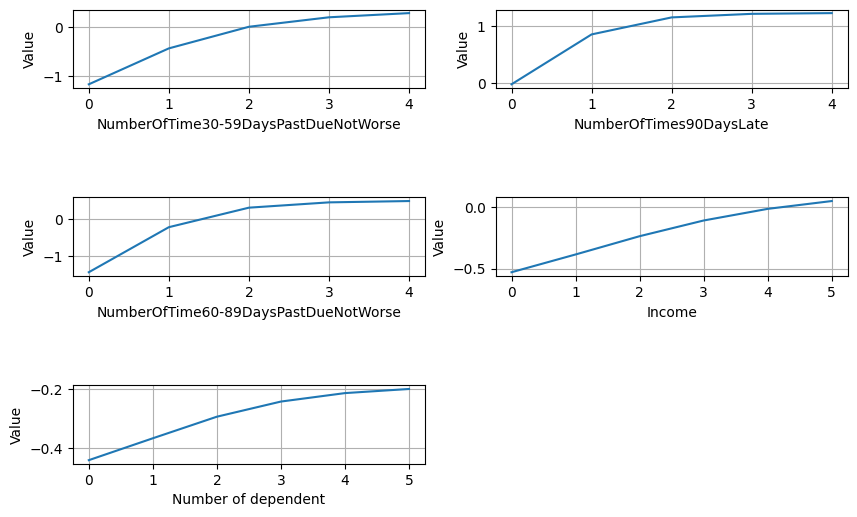

In [26]:
ind=0
visu=[]
for i in range(len(X[0])):
  if(i in monotonic_feature):
    visui=[]
    for j in range(len(individual_output[ind])):
      temp=np.zeros(len(X[0]))
      temp[i]=individual_output[ind][j]
      individual_output_now = Model.calc_outputs([temp], training=True)
      visui.append(individual_output_now[i])
    visu.append(visui)
    ind+=1

fig = plt.figure(figsize=(10,12))
plt.subplot(10, 2, 1)
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('Value')
plt.plot(visu[0])
plt.grid()

plt.subplot(10, 2, 2)
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('Value')
plt.plot(visu[1])
plt.grid()

plt.subplot(10, 2, 5)
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('Value')
plt.plot(visu[2])
plt.grid()


plt.subplot(10, 2, 6)
plt.xlabel('Income')
plt.ylabel('Value')
plt.plot(visu[3])
plt.grid()


plt.subplot(10, 2, 9)
plt.xlabel('Number of dependent')
plt.ylabel('Value')
plt.plot(visu[4])
plt.grid()

###None monotonicity features(6,7,8,9,10)

In [27]:
def none_descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X):
  none_individual_output=[]
  bar=np.zeros(len(monotonic_feature))
  for i in range(len(monotonic_feature)):
    none_individual_output.append(np.linspace(lower_bound[i], upper_bound[i], num=spli[i]))
  return none_individual_output


none_monotonic_feature=[5,6,7,8,9]
none_lower_bound=[0,0,0,0,0]
none_upper_bound=[10,10,10,10,10]
none_spli=[11,11,11,11,11]
none_individual_output=none_descretize_single(none_monotonic_feature,none_lower_bound,none_upper_bound,none_spli,X)

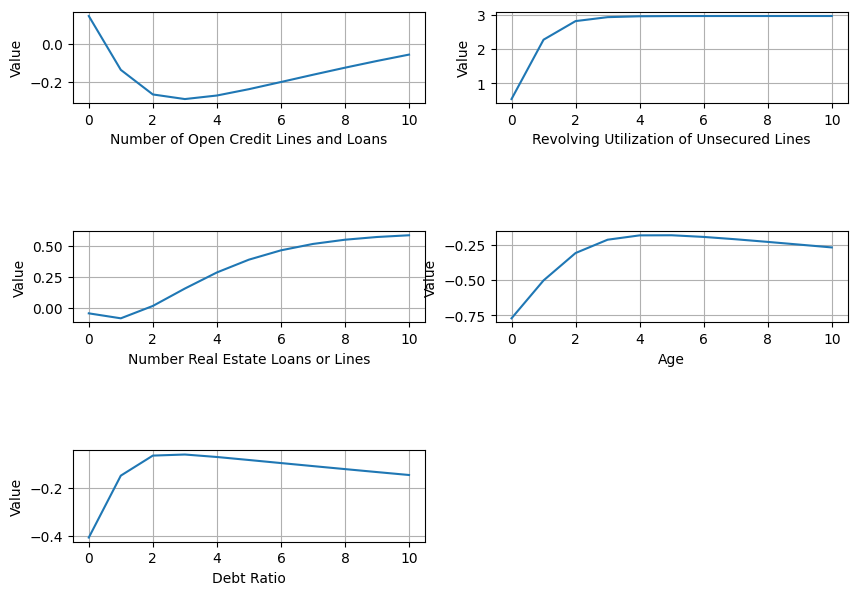

In [28]:
ind=0
visu=[]
for i in range(len(X[0])):
  if(i in none_monotonic_feature):
    visui=[]
    for j in range(len(none_individual_output[ind])):
      temp=np.zeros(len(X[0]))
      temp[i]=none_individual_output[ind][j]
      none_individual_output_now = Model.calc_outputs([temp], training=True)
      visui.append(none_individual_output_now[i])
    visu.append(visui)
    ind+=1


fig = plt.figure(figsize=(10,14))
plt.subplot(10, 2, 1)
plt.xlabel('Number of Open Credit Lines and Loans')
plt.ylabel('Value')
plt.plot(visu[0])
plt.grid()

plt.subplot(10, 2, 2)
plt.xlabel('Revolving Utilization of Unsecured Lines')
plt.ylabel('Value')
plt.plot(visu[1])
plt.grid()

plt.subplot(10, 2, 5)
plt.xlabel('Number Real Estate Loans or Lines')
plt.ylabel('Value')
plt.plot(visu[2])
plt.grid()

plt.subplot(10, 2, 6)
plt.xlabel('Age')
plt.ylabel('Value')
plt.plot(visu[3])
plt.grid()

plt.subplot(10, 2, 9)
plt.xlabel('Debt Ratio')
plt.ylabel('Value')
plt.plot(visu[4])
plt.grid()

#AUC of the Model

In [29]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred=np.array(Model(X))
roc_auc_score(Y, y_pred)

0.8492379106254206